# Wikipedia2014 + Gigaword5 and GloVe
ref: https://nlp.stanford.edu/projects/glove/

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.Session(config = config)

from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout, Reshape, Bidirectional, Conv2D, MaxPool2D, Concatenate, Activation
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 300
VALIDATION_SPLIT = 0.3
#############################################################################
# TODO: this should be the same as the dimension of word embedding you are  #
# using                                                                     #
#############################################################################
EMBEDDING_DIM = 50
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#############################################################################
# TODO: please assign the absolute path to the GloVe txt file               #
# (glove.6B.50d.txt or any dimension you like)                              #
#############################################################################
path_to_glove = '/home/robinlin/Desktop/secsemesInJunior/datascience/May_15th/glove.6B/glove.6B.50d.txt'
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################
tmp_file_name = 'word2vec.6B.txt'

glove_file = datapath(path_to_glove)
tmp_file = get_tmpfile(tmp_file_name)

glove2word2vec(glove_file, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

Print the type the word vector of 'animal', the dimension (shape) of this vector, and the content of thie vector.

If you use 300 dimensions word vectors, the correct outout will be something like this:
```
(numpy.ndarray,
 (300,),
 array([ 0.25653  ,  0.66592  , -0.5313   ,  0.20342  ,  0.40049  ,
 ... multiple lines are omitted ...
        -0.14921  ,  0.2404   ,  0.22182  ,  0.68883  , -0.018991 ],
       dtype=float32))
```

In [3]:
#############################################################################
# TODO: please print the type the word vector of 'animal', the dimension    #
# (shape) of this vector, and the content of thie vector.                   #
#############################################################################
print(type(model.get_vector('animal')))
print(model.get_vector('animal'))
print(model.get_vector('animal').shape)

#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

<class 'numpy.ndarray'>
[ 0.49652   -0.65143   -1.0869    -0.10205    0.81724    0.923
 -0.56206   -1.3801     1.8115     0.068438   0.63906    0.24468
  1.0308     0.10202    0.48498   -0.08387    0.61688    0.35812
 -0.75196   -0.3548    -0.14173    0.042311   0.42242   -0.21013
  0.28935   -1.1214    -0.5278    -0.046298   0.064643  -0.43924
  2.4004    -0.29715   -0.19765   -0.88725   -0.62955    0.64092
  0.14741   -0.0089431  0.39569    0.060899  -0.33917   -0.15897
  0.22115    0.83813    1.6032    -0.010252  -0.36843   -0.32005
  0.4658    -0.10813  ]
(50,)


Use [similar_by_vector](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.similar_by_vector) to obtain the 10 most similar word to 'france'

If you use 300 dimensions word vectors, the correct outout will be something like this:
```
[('france', 1.0),
 ('french', 0.7344760894775391),
 ('paris', 0.6580672264099121),
 ('belgium', 0.620672345161438),
 ('spain', 0.573593258857727),
 ('italy', 0.5643459558486938),
 ('germany', 0.5567397475242615),
 ('prohertrib', 0.5564222931861877),
 ('britain', 0.5553334951400757),
 ('chirac', 0.5362644195556641)]
```

In [4]:
#############################################################################
# TODO: use similar_by_vector to obtain the 10 most similar word to 'france'#
#############################################################################
model.similar_by_vector(model.get_vector('france'))
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

[('france', 0.9999999403953552),
 ('french', 0.8868120908737183),
 ('belgium', 0.8631513118743896),
 ('paris', 0.8025329113006592),
 ('spain', 0.7909148931503296),
 ('netherlands', 0.7893801331520081),
 ('italy', 0.7788637280464172),
 ('germany', 0.7744609117507935),
 ('european', 0.7626757025718689),
 ('switzerland', 0.757765531539917)]

Use [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.Word2VecKeyedVectors.most_similar) to obtain the result of 'woman' + 'king' - 'man'

If you use 300 dimensions, the correct output will be somthing like this:
```
[('queen', 0.6713277101516724),
 ('princess', 0.5432624220848083),
 ('throne', 0.5386104583740234),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.498025119304657),
 ('mother', 0.4956442713737488),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747087478637695),
 ('prince', 0.4668239951133728),
 ('wife', 0.4647327661514282)]
```

In [5]:
#############################################################################
# TODO: use most_similar to obtain the result of 'woman' + 'king' - 'man'   #
#############################################################################
model.most_similar(positive=['woman', 'king'], negative=['man'])
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

[('queen', 0.8523603677749634),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424569725990295),
 ('kingdom', 0.7337411642074585),
 ('monarch', 0.7214490175247192),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099430561065674)]

Use [doesnt_match](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.doesnt_match) to obtain the word with the different meaning with the other words in a list 'breakfast', 'lunch', 'dinner', 'cereal'

If you use 300 dimensions, the correct output will be something like this:
```
'cereal'
```

In [6]:
#############################################################################
# TODO: Use doesnt_match to obtain the word with the different meaning with #
# the other words in a list 'breakfast', 'lunch', 'dinner', 'cereal'        #
#############################################################################
model.doesnt_match("breakfast cereal dinner lunch".split())
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

'cereal'

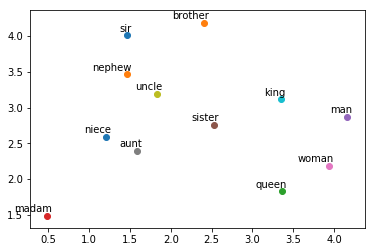

In [7]:
def pca_plot(model):
    labels = []
    tokens = []

    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = PCA(n_components = 2)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        label = labels[i]
        if label in ['king', 'queen', 'sister', 'brother', 'niece', 'nephew', 'aunt', 'uncle', 'woman', 'man', 
                     'madam', 'sir']:
            plt.scatter(x[i],y[i])
            plt.annotate(label,
                         xy = (x[i], y[i]),
                         xytext = (5, 2),
                         textcoords = 'offset points',
                         ha = 'right',
                         va = 'bottom')
    plt.show()

pca_plot(model)

# Reuter-21578 Data set with word2vec
Last week, you have already worked on Reuters-21578 dataset for multi-class classification. This week, you are using word2vec to classify the same dataset.

In this lab, you will have to implement 3 three neural network models using keras API:
1. Mutilayer perceptron
2. Conv1D
3. LSTM or GRU

In [8]:
# this requires download from the first time
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = MAX_NB_WORDS, 
                                                         skip_top = 0, 
                                                         maxlen = MAX_SEQUENCE_LENGTH,
                                                         seed = 113,
                                                         start_char = 1, 
                                                         oov_char = 2, 
                                                         index_from = 3)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

word2index = reuters.get_word_index()
word2index = {key : (value + 3) for (key, value) in word2index.items()}
word2index['<PAD>'] = 0
word2index['<START>'] = 1
word2index['<UNK>'] = 2
print(len(word2index))

30982


In [9]:
############################################################################
# TODO: create a embeddings_index to map word to word vector and print the  #
# number of words in the embedding                                          #
#############################################################################
embeddings_index = dict()
for (key, value) in word2index.items():
    
    try: 
        embeddings_index[key] = model.get_vector(key)
    except: 
        embeddings_index[key] = np.zeros((EMBEDDING_DIM,))
#         print('{} not in wordvectors'.format(key))

#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################


#############################################################################
# TODO: create a embedding_matrix that map the index of word2index to word  #
# vectors                                                                   #
#############################################################################
embedding_matrix = np.zeros((MAX_NB_WORDS, EMBEDDING_DIM))

for (key, value) in word2index.items():
    if (value < MAX_NB_WORDS):
        embedding_matrix[value] = embeddings_index[key]
    else:
        continue
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

#############################################################################
# TODO: define an embedding layer that initialize the weights with          #                                         
# embedding_matrix and set trainable to False                               #
#############################################################################
pass
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################
embedding_layer = Embedding(MAX_NB_WORDS,
                            EMBEDDING_DIM,
                            weights = [embedding_matrix],
                            input_length = MAX_SEQUENCE_LENGTH,
                            trainable = False)

In [10]:
#############################################################################
# TODO: Use keras pad_sequences to pad the sequence in X_train and X_test   #
# to MAX_SEQUENCE_LENGTH                                                    #
#############################################################################
# print(X_train[0])
# print(X_test[0])
# X_train_shape = X_train.shape
# X_test_shape = X_test.shape
# print(X_train_shape)
# print(X_test_shape)
# X_train2 = np.zeros((len(X_train)))
X_train = pad_sequences(X_train, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
X_test = pad_sequences(X_test, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

In [11]:
print('Shape of X_train tensor:', X_train.shape)
print('Shape of X_test tensor:', X_test.shape)

# split the data into a training set and a validation set
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]
nb_validation_samples = int(VALIDATION_SPLIT * X_train.shape[0])

X_val = X_train[-nb_validation_samples:]
y_val = y_train[-nb_validation_samples:]
X_train = X_train[:-nb_validation_samples]
y_train = y_train[:-nb_validation_samples]

Shape of X_train tensor: (7976, 300)
Shape of X_test tensor: (1994, 300)


## word2vec + multiple layer perceptron
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 300)          9294900   
_________________________________________________________________
flatten_1 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               11520128  
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 46)                1518      
_________________________________________________________________
activation_4 (Activation)    (None, 46)                0         
=================================================================
Total params: 20,826,882
Trainable params: 11,531,982
Non-trainable params: 9,294,900
_________________________________________________________________
```

In [12]:
#############################################################################
# TODO: Define the model of multiple layer perceptron similar to the model  #
# summary above into the variable model, compile it and fit it.             #
#############################################################################
#from keras.models import Sequential


input_layer = Input(shape = (MAX_SEQUENCE_LENGTH, ))
embedding = embedding_layer(input_layer)
flatten = Flatten()(embedding)
dense1 = Dense(128, activation = 'relu')(flatten)
dense2 = Dense(64, activation = 'relu')(dense1)
dense3 = Dense(32, activation = 'relu')(dense2)
dense4 = Dense(46, activation = 'softmax')(dense3)

model = Model(inputs = input_layer, outputs = dense4)

model.summary()

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(X_train, 
          y_train, 
          epochs = 20, 
          batch_size = 512, 
          validation_data = (X_val, y_val))

#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 15000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1920128   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 46)                1518      
Total para

In [13]:

results = model.evaluate(X_test, y_test)
results

1994/1994 [==============================] - 1s 559us/step


[2.094042325330713, 0.6619859578736209]

## word2vec + Conv1D
```
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 300)          9294900   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 64)           96064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3776)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3776)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                241728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
=================================================================
Total params: 9,635,682
Trainable params: 340,782
Non-trainable params: 9,294,900
_________________________________________________________________
```

In [14]:
#############################################################################
# TODO: Define the model of 1D convolution similar to the model summary     #
# above into the variable model, compile it and fit it.                     #
#############################################################################

# input_layer = Input(shape = (MAX_SEQUENCE_LENGTH, ))
# embedding = embedding_layer(input_layer)
# flatten = Flatten()(embedding)
# dense1 = Dense(128, activation = 'relu')(flatten)
# dense2 = Dense(64, activation = 'relu')(dense1)
# dense3 = Dense(32, activation = 'relu')(dense2)
# dense4 = Dense(46, activation = 'softmax')(dense3)


input_2 = Input(shape = (MAX_SEQUENCE_LENGTH,))
embedding_1 = embedding_layer(input_2)
conv1d_1 = Conv1D(64, 4, activation = 'relu')(embedding_1)
max_pooling1d_1 = MaxPooling1D(5)(conv1d_1)
flatten_2 = Flatten()(max_pooling1d_1)
dropout_1 = Dropout(0.4)(flatten_2)
dense_5 = Dense(64, activation = 'relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_5)
dense_6 = Dense(46, activation = 'softmax')(dropout_2)



model = Model(inputs = input_2, outputs = dense_6)

model.summary()

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(X_train, 
          y_train, 
          epochs = 20, 
          batch_size = 512, 
          validation_data = (X_val, y_val))

#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 297, 64)           12864     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3776)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3776)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                241728    
__________

In [15]:
results = model.evaluate(X_test, y_test)
results

1994/1994 [==============================] - 1s 545us/step


[1.2134312522805921, 0.713640922887873]

## word2vec + LSTM (GRU)
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_3 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 300)          9294900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_7 (Dense)              (None, 46)                5934      
=================================================================
Total params: 9,520,482
Trainable params: 225,582
Non-trainable params: 9,294,900
_________________________________________________________________
```

In [16]:
sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedded_sequences = embedding_layer(sequence_input)

units = 128
embedded_sequences = embedding_layer(sequence_input)
layer1 = LSTM(units,
    dropout = 0.2,
    recurrent_dropout = 0.2,
    return_sequences = False)
x = layer1(embedded_sequences)

final_layer = Dense(46, activation = 'softmax')
preds = final_layer(x)

model = Model(sequence_input, preds)
print(model.summary())
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

model.fit(X_train, y_train, validation_data = (X_val, y_val),
          epochs = 20, batch_size = 256)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_7 (Dense)              (None, 46)                5934      
Total params: 597,582
Trainable params: 97,582
Non-trainable params: 500,000
_________________________________________________________________
None
Train on 5584 samples, validate on 2392 samples
Epoch 1/20
5584/5584 [==============================] - 56s 10ms/step - loss: 3.1656 - acc: 0.3569 - val_loss: 2.3736 - val_acc: 0.3972
Epoch 2/20
5584/5584 [==============================] - 45s 8ms/step - los

In [17]:
results = model.evaluate(X_test, y_test)
results

1994/1994 [==============================] - 6s 3ms/step


[2.3135911043333555, 0.3971915748437405]